# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.13.2', '3.7.5')

# 1. Load the data

In [3]:
df = pd.read_csv('../data/Cars.csv')

In [4]:
#check the first rows of the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
#check the columns and shpae of the data
df.columns, df.shape

(Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
        'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
        'seats'],
       dtype='object'),
 (8128, 13))

In [6]:
#statistical info
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
#check dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# 2. Exploratory data analysis

### Label Encoding

In [8]:
# For feature 'owner', define the mapping:  map First owner to 1, ..., Test Drive Car to 5
df["owner"] = df["owner"].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5 })
df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
# For feature 'fuel', remove all rows where 'fuel' is 'CNG' or 'LPG'
df = df[~df['fuel'].isin(['CNG','LPG'])]

In [10]:
# For feature 'mileage', remove “kmpl” and convert to float dtype
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [11]:
# For feature 'engine', remove 'CC' and convert to float
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)

In [12]:
# For feature 'max_power', remove 'bph' and convert to float
df['max_power'] = df['max_power'].str.split(' ').str[0].astype(float)

In [13]:
# For the feature 'name', take only the first word and rename it to 'brand'
df['name'] = df['name'].str.split(' ').str[0]
df = df.rename(columns={'name': 'brand'}) 

In [14]:
# Drop the feature torque
df.drop(columns = ['torque'], inplace=True)

In [15]:
# Delete all samples related to Owner == Test Drive Car which is 5
df = df[~df['owner'].isin([5])]

In [16]:
#cleaned data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis

#### Countplot
Since 'fuel', 'seller_type' and 'seats' features have less variations, it can be analyzed with countplot.

<Axes: xlabel='fuel', ylabel='count'>

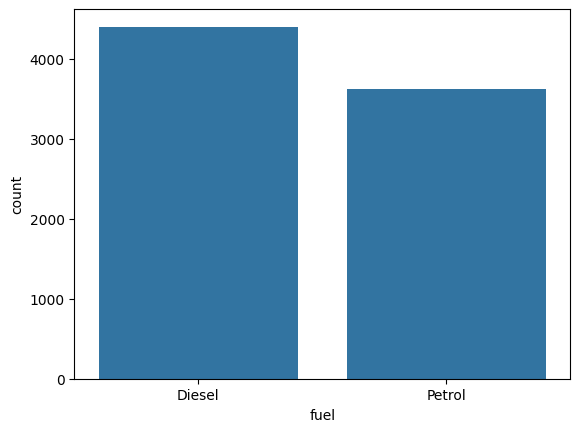

In [17]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

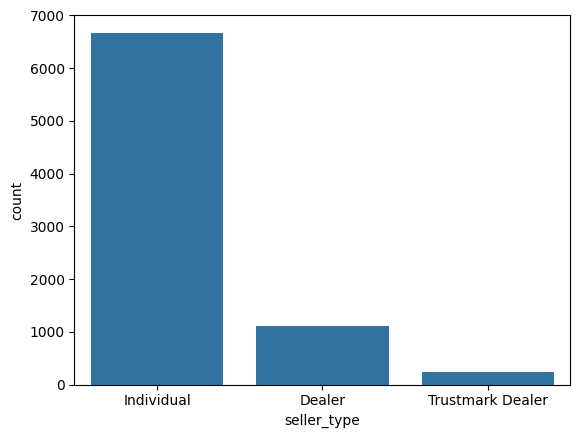

In [18]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='seats', ylabel='count'>

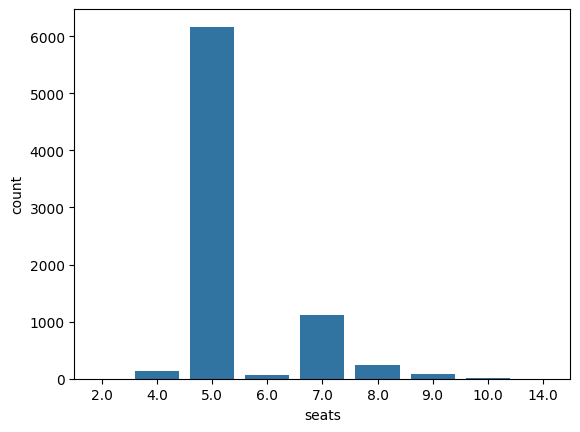

In [19]:
sns.countplot(data = df, x = 'seats')

### Distribution plot

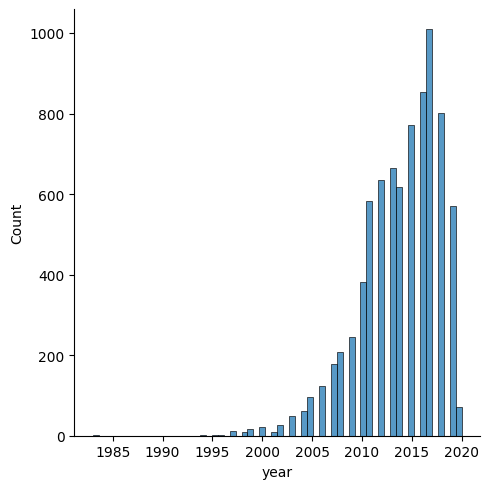

In [20]:
sns.displot(data = df, x = 'year')

### Multivariate analysis

#### Boxplot
Boxplot is used to analyze outliers.

Text(0.5, 0, 'Fuel')

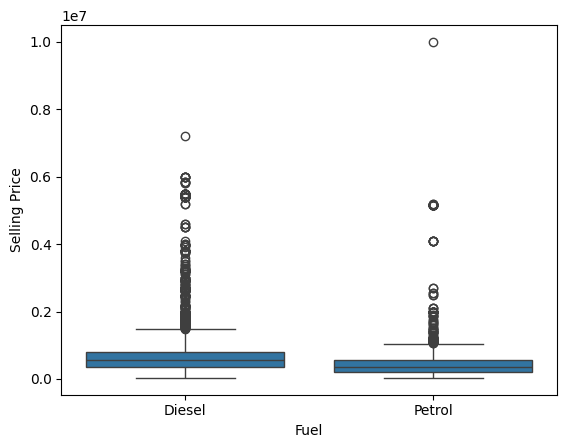

In [21]:
sns.boxplot(x = df['fuel'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Fuel")

Text(0.5, 0, 'Seller Type')

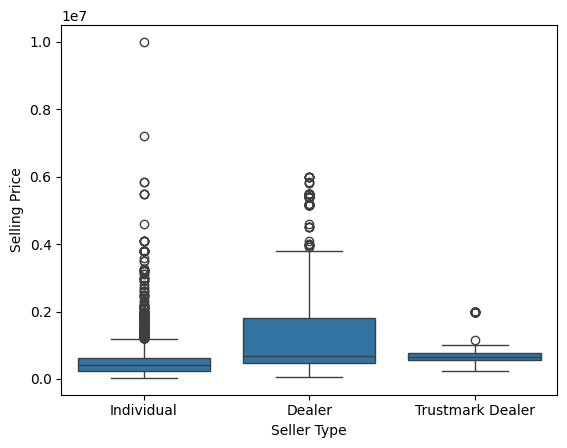

In [22]:
sns.boxplot(x = df['seller_type'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

### Correlation matrix

To see the correlation between the features, all features should be in numeric data type. Therefore, the object type features are changed to numeric using label encoding. In this case, the brand of the car can affect the selling price. That's why it is label-encoded to see the correlation.

In [23]:
# label encoding method is used to convert the columns to numeric
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [24]:
# check to see what numbers are mapped to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [25]:
# save the names and get the mapping of the classes
brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))
brand_mapping

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

In [26]:
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'].unique()

array([0, 1])

In [27]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [28]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [29]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [30]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [31]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [32]:
# # Apply log transformation to the 'selling_price' column
# df['selling_price'] = np.log(df['selling_price'])
# df['selling_price']

In [33]:
#check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 947.9 KB


<Axes: >

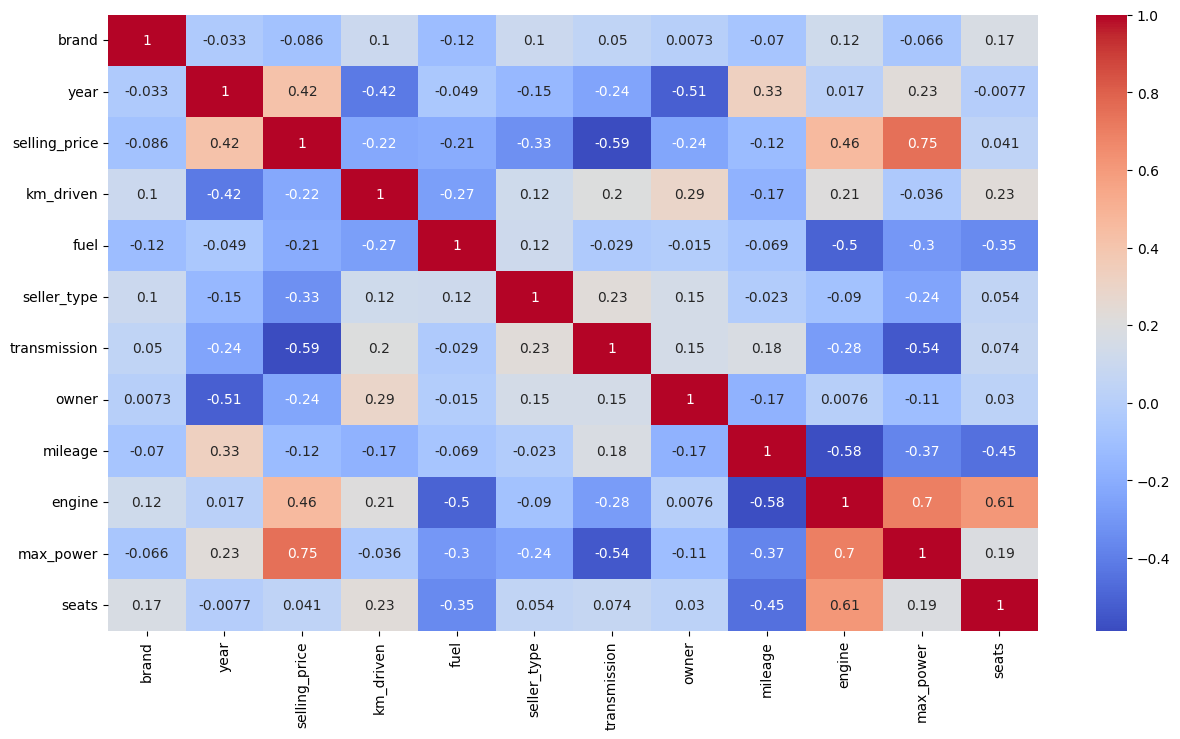

In [34]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

Regarding the heatmap, it can be concluded that the selling price of the cars are highly correlated to the years, max_power and engine of the cars. These features will have an impact on the selling_price of the cars. By interpreting this heatmap, it can be helpful to decide which features to chooes for building the model. 

### Predictive Power Score

This is used to better understand how features are related to the target variable and to confirm the assumptions about their relationships.

<Axes: xlabel='x', ylabel='y'>

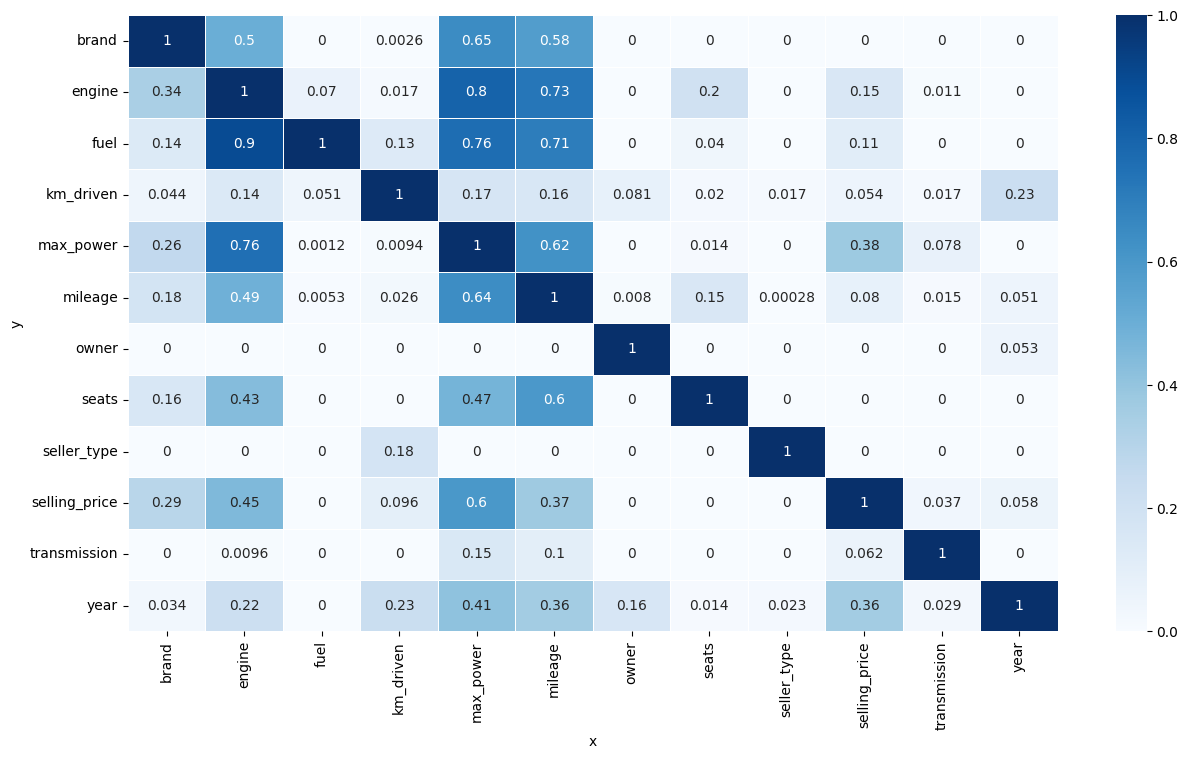

In [35]:
import ppscore as pps
# Copy the data fram to advoid manipulating the original data frame
dfcopy = df.copy()

# Preprocessing using pivot
matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns= 'x', index= 'y', values= 'ppscore')

# Plot
plt.figure(figsize=(15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths= 0.5, annot= True)

# 3. Feature engineering

This step is skipped. No new feature is created.

# 4. Feature selection

Three features chosen for selling_price prediction are 'year', 'mileage', and 'max_power' because the selling price can be affected by these features: the years the car fabricated, how much kilometers per liter of fuel the car can drive, and the highest power output of the car.

In [36]:
#X is the features used to predict cars' selling price 
X = df[   ['year', 'mileage', 'max_power']   ]

#y is the cars' selling price
y = np.log(df['selling_price'])

In [37]:
print(X.shape)
print(y.shape)

(8028, 3)
(8028,)


### Train and split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X_train.shape ,  X_test.shape

((6422, 3), (1606, 3))

In [40]:
y_train.shape , y_test.shape

((6422,), (1606,))

# 5. Preprocessing

In [41]:
#check for null values
X_train.isna().sum()

year           0
mileage      171
max_power    165
dtype: int64

In [42]:
y_train.isna().sum()

0

In [43]:
X_test.isna().sum()

year          0
mileage      43
max_power    43
dtype: int64

In [44]:
y_test.isna().sum()

0

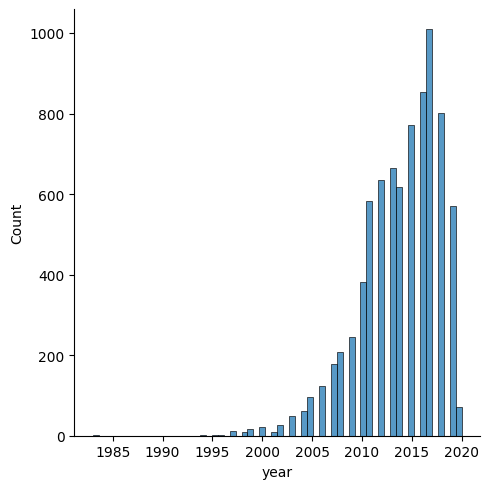

In [45]:
sns.displot( data = df, x = 'year' )

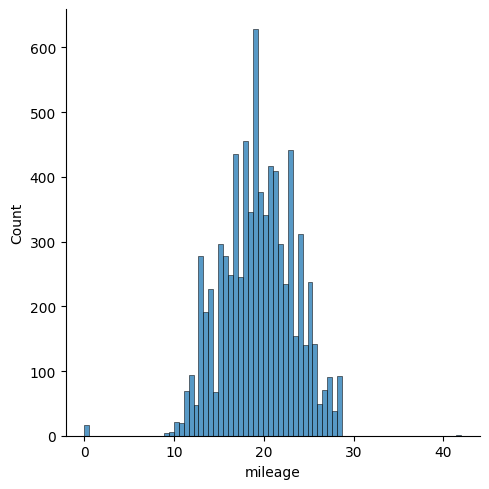

In [46]:
sns.displot( data = df, x = 'mileage' )

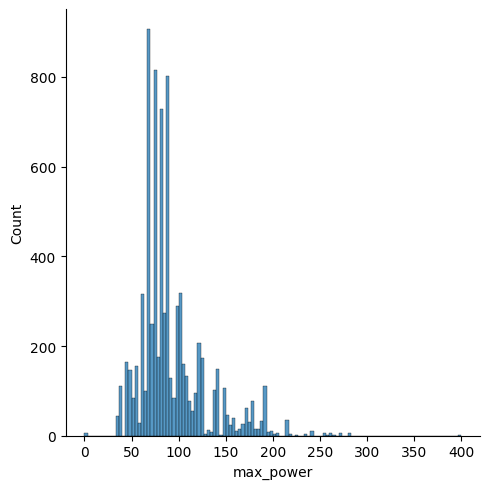

In [47]:
sns.displot( data = df, x = 'max_power' )

In [48]:
#let's fill the training set first
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [49]:
#let's fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [50]:
#check again
X_train.isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [51]:
X_test.isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [52]:
y_train.isna().sum()

0

In [53]:
y_test.isna().sum()

0

### Checking outliers

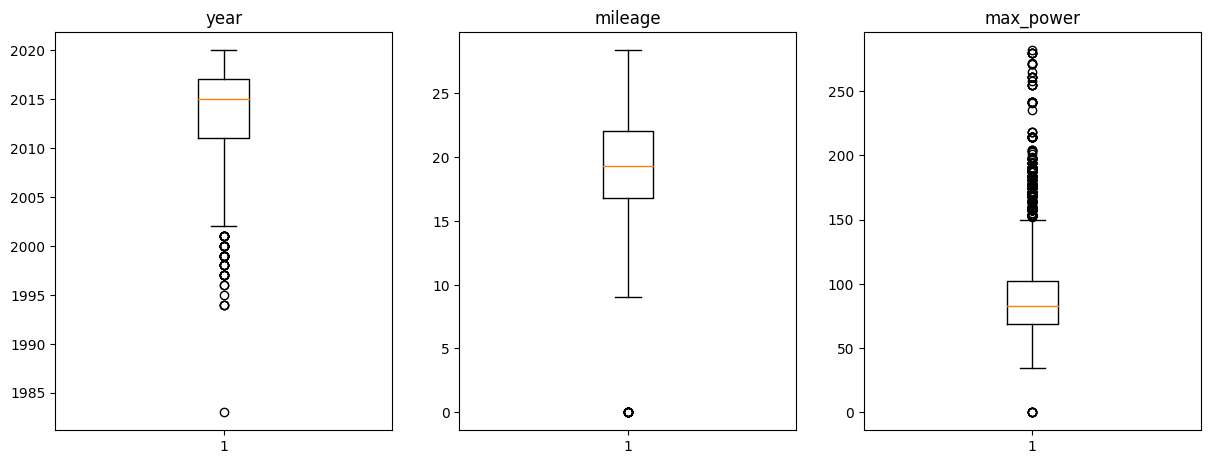

In [54]:
# Create a dictionary of columns.
col_dict = {'year':1, 'mileage':2, 'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [55]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [56]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


### Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [58]:
# y_train = y_train.values
y_train = y_train.to_numpy()
print(f'ytrain: {type(y_train)}')

ytrain: <class 'numpy.ndarray'>


In [59]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [60]:
# Adding intercepts to include a bias in theta
# actually you can do like this too
# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [61]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


# 6. Modeling 

In [62]:
#experiment tracking
import mlflow
import os
import logging

mlflow.set_tracking_uri("http://localhost:5000")
os.environ["LOGNAME"] = "kapaw"
mlflow.set_experiment(experiment_name="A2-Car-price-prediction")
logging.getLogger("mlflow").setLevel(logging.WARNING)

2025/02/20 22:39:53 INFO mlflow.tracking.fluent: Experiment with name 'A2-Car-price-prediction' does not exist. Creating a new experiment.


In [63]:
import numpy as np
from sklearn.model_selection import KFold
import mlflow

class LinearRegression(object):
    
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, grad='batch', num_epochs=500, batch_size=50, cv=kfold, init_theta='xavier', momentum=0.0):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.grad       = grad
        self.cv         = cv
        self.regularization = regularization
        self.init_theta = init_theta
        self.momentum   = momentum
        self.prev_step  = None

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2_score(self, ytrue, ypred):
        ss_total = ((ytrue - ytrue.mean()) ** 2).sum()
        ss_residual = ((ytrue - ypred) ** 2).sum()
        return 1 - (ss_residual / ss_total)
    
    def initialize_weights(self, n_features):
        if self.init_theta == 'zero':
            return np.zeros(n_features)
        elif self.init_theta == 'xavier':
            lower, upper = - (1.0 / np.sqrt(n_features)), (1.0 / np.sqrt(n_features))
            return lower + np.random.rand(n_features) * (upper - lower)
    
    def fit(self, X_train, y_train):
        
        self.kfold_scores = list()
        self.val_loss_old = np.infty

        y_train = np.array(y_train)  

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            self.theta = self.initialize_weights(X_cross_train.shape[1])
            self.prev_step = np.zeros_like(self.theta)  
            
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"grad": self.grad, "lr": self.lr, "reg": type(self).__name__, "init_theta": self.init_theta, "momentum": self.momentum}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.grad == 'sto':
                        
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_grad_train = X_cross_train[batch_idx].reshape(1, -1)
                            y_grad_train = np.array([y_cross_train[batch_idx]])     

                            train_loss = self._train(X_grad_train, y_grad_train)
                            train_loss = self._train(X_grad_train, y_grad_train)

                    elif self.grad == 'mini':

                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_grad_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_grad_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_grad_train, y_grad_train)
                    else:
                        
                        X_grad_train = X_cross_train
                        y_grad_train = y_cross_train
                        train_loss = self._train(X_grad_train, y_grad_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)

                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
    def _train(self, X, y):

        yhat = self.predict(X)
        m = X.shape[0]

        grad = (1/m) * X.T @ (yhat - y)

        if self.regularization is not None:  
            grad += self.regularization.derivation(self.theta)

        step = self.lr * grad
        if self.momentum > 0:
            self.theta = self.theta - step + self.momentum * self.prev_step
            self.prev_step = step
        else:
            self.theta = self.theta - step

        return self.mse(y, yhat)

    
    def predict(self, X):
        return X @ self.theta  
    
    def _coef(self):
        return self.theta[1:]  
                               
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        feature_names = ["year", "mileage", "max_power"]
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,max(self._coef())*1.3]) 
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()

In [64]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Lasso(LinearRegression):
    def __init__(self, grad, lr, l=0.1, init_theta='xavier', momentum=0.0):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, grad, init_theta=init_theta, momentum=momentum)

class Ridge(LinearRegression):
    def __init__(self, grad, lr, l=0.1, init_theta='xavier', momentum=0.0):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, grad, init_theta=init_theta, momentum=momentum)

class Normal(LinearRegression):
    def __init__(self, grad, lr, init_theta='xavier', momentum=0.0):
        super().__init__(None,  lr, grad, init_theta=init_theta, momentum=momentum)

### 6.1 Experiment

In [65]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [66]:
import numpy as np
import mlflow
from sklearn.preprocessing import PolynomialFeatures

polynomials = ["True", "False"]

regs = ["Ridge", "Lasso", "Normal"]

grads = ["batch", "mini", "sto"]

init_theta = ["zero", "xavier"]

momentums = [0.0, 0.9]

learning_rates = [0.01, 0.001, 0.0001]

POLY_DEGREE = 1
poly_transformer = PolynomialFeatures(degree=POLY_DEGREE)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

for poly in polynomials:
    for reg in regs:
        for grad in grads:
            for theta in init_theta:
                for momentum in momentums:
                    for lr in learning_rates:

                        print("="*40)
                        print(f"Using Polynomial Degree: {POLY_DEGREE}" if poly == "True" else "Polynomial: False")
                        print(f"===== Regularization: {reg} =====")
                        print(f"===== Grad: {grad} =====")
                        print(f"===== Init_Method: {theta} =====")
                        print(f"===== Momentum: {momentum} =====")
                        print(f"===== Learning Rate: {lr} =====")
                        print("="*40)
                        
                        type_of_regression = str_to_class(reg)
                        params = {"grad": grad, "lr": lr, "init_theta": theta, "momentum": momentum}

                        if poly == "True":
                            X_train_used = X_train_poly
                            X_test_used = X_test_poly
                        else:
                            X_train_used = X_train
                            X_test_used = X_test

                        with mlflow.start_run(run_name=f"{reg}-grad-{grad}-lr-{lr}-init-{theta}-momentum-{momentum}-poly-{poly}", nested=True):

                            mlflow.log_params(params=params)
                            model = type_of_regression(**params)
                            model.fit(X_train_used, y_train)

                            yhat_train = model.predict(X_train_used)
                            yhat_test = model.predict(X_test_used)
              
                            mlflow.log_metric(key="train_mse", value=model.mse(y_train, yhat_train))
                            mlflow.log_metric(key="train_r2", value=model.r2_score(y_train, yhat_train))
                            mlflow.log_metric(key="test_mse", value=model.mse(y_test, yhat_test))
                            mlflow.log_metric(key="test_r2", value=model.r2_score(y_test, yhat_test))

                            print(f"Completed run: {reg}-grad-{grad}-lr-{lr}-init-{theta}-momentum-{momentum}-poly-{poly}")

                            signature = mlflow.models.infer_signature(X_train_used, model.predict(X_train_used))
                            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

Using Polynomial Degree: 1
===== Regularization: Ridge =====
===== Grad: batch =====
===== Init_Method: zero =====
===== Momentum: 0.0 =====
===== Learning Rate: 0.01 =====
Fold 0: 1.5587400612490958
Fold 1: 1.5240586358012416
Fold 2: 1.5008495097147152
Completed run: Ridge-grad-batch-lr-0.01-init-zero-momentum-0.0-poly-True
Using Polynomial Degree: 1
===== Regularization: Ridge =====
===== Grad: batch =====
===== Init_Method: zero =====
===== Momentum: 0.0 =====
===== Learning Rate: 0.001 =====
Fold 0: 26.269955855147185
Fold 1: 26.553262778035243
Fold 2: 26.314708607470138
Completed run: Ridge-grad-batch-lr-0.001-init-zero-momentum-0.0-poly-True
Using Polynomial Degree: 1
===== Regularization: Ridge =====
===== Grad: batch =====
===== Init_Method: zero =====
===== Momentum: 0.0 =====
===== Learning Rate: 0.0001 =====
Fold 0: 138.30624560791918
Fold 1: 139.161428039024
Fold 2: 138.60552948898828
Completed run: Ridge-grad-batch-lr-0.0001-init-zero-momentum-0.0-poly-True
Using Polynomia

# 7. Testing

In [67]:
import numpy as np
import mlflow
from sklearn.preprocessing import PolynomialFeatures

polynomials = ["False"]

regs = ["Normal"]

grads = ["sto"]

init_theta = ["xavier"]

momentums = [0.9]

learning_rates = [0.0001]

for poly in polynomials:
    for reg in regs:
        for grad in grads:
            for theta in init_theta:
                for momentum in momentums:
                    for lr in learning_rates:

                        print("="*40)
                        print(f"Using Polynomial Degree: {POLY_DEGREE}" if poly == "True" else "Polynomial: False")
                        print(f"===== Regularization: {reg} =====")
                        print(f"===== Grad: {grads} =====")
                        print(f"===== Init_Method: {init_theta} =====")
                        print(f"===== Momentum: {momentum} =====")
                        print(f"===== Learning Rate: {lr} =====")
                        print("="*40)
                        
                        type_of_regression = str_to_class(reg)
                        params = {"grad": grad, "lr": lr, "init_theta": theta, "momentum": momentum}

                        if poly == "True":
                            POLY_DEGREE = 1
                            poly_transformer = PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)
                            X_train_poly = poly_transformer.fit_transform(X_train)
                            X_test_poly = poly_transformer.transform(X_test)

                            X_train_used = X_train_poly
                            X_test_used = X_test_poly

                        else:
                            X_train_used = X_train
                            X_test_used = X_test

                        model = type_of_regression(**params)
                        model.fit(X_train_used, y_train)

Polynomial: False
===== Regularization: Normal =====
===== Grad: ['sto'] =====
===== Init_Method: ['xavier'] =====
===== Momentum: 0.9 =====
===== Learning Rate: 0.0001 =====
Fold 0: 0.12961278236544094
Fold 1: 0.11743858657217286
Fold 2: 0.11074130473918871


In [68]:
# Saving values to put into model file
year_default = 2014
mileage_default = 19.01
max_power_default = 108.45

In [69]:
# Testing our model using the testing set and showing the mse and r2
yhat = model.predict(X_test)
mse  = model.mse(y_test, yhat)
r2 = model.r2_score(y_test, yhat)
print("MSE :", mse)
print("R2 :", r2)

MSE : 0.10870084411737457
R2 : 0.8473605860392465


# 8. Analysis

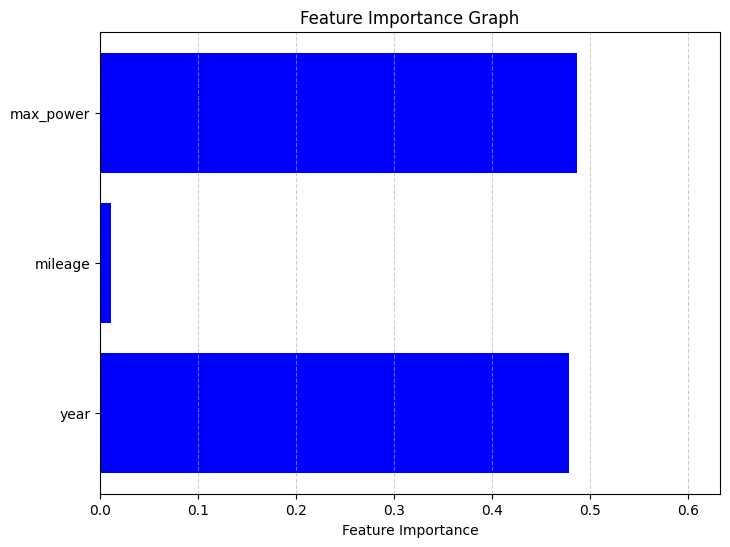

In [70]:
# Feature importance graph by calling the custom method from the LinearRegression class
model.feature_importance()

# 9. Inference

In [71]:
# Save the model,scaler and values together
model_zip = {
    'model': model,
    'scaler': scaler,
    'year_default' : year_default,
    'mileage_default' : mileage_default,
    'max_power_default' : max_power_default
}

In [72]:
import pickle
# Save the model to disk
filename = './model/car_selling_price_new.model'
pickle.dump(model_zip, open(filename, 'wb'))

In [73]:
loaded_data = pickle.load(open(filename, 'rb'))

In [74]:
# Loading the model and scaler to test
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [75]:
# Try to create the example from the dataset
df[ ['year', 'max_power', 'mileage']].loc[1]

year         2014.00
max_power     103.52
mileage        21.14
Name: 1, dtype: float64

In [76]:
# The real selling price of this sample
df['selling_price'].loc[1]

370000

In [ ]:
sample = np.array([[2014,21.14, 103.52]])
sample_scaled = loaded_scaler.transform(sample)
intercept = np.ones((sample_scaled.shape[0], 1))
sample_scaled_concat  = np.concatenate((intercept, sample_scaled), axis=1)
sample_scaled_concat

array([[1.        , 0.04494691, 0.44338931, 0.34024827]])

In [ ]:
predicted_price = model.predict(sample_scaled_concat)
predicted_price = np.exp(predicted_price)  
print(f"Predicted Car Price: {predicted_price}")

Predicted Car Price: [525011.89771524]


# Car selling price prediction analysis and report

As we can see from the logs of MLFlow, the model with parameters of polynomial features, noraml regularization, stocastic method, with momentum 0.9, and learning rate of 0.01 is the best model with lowest mse and highest r2 scores. According to the top mlflow logs from the below image, the top models are all with Noraml regularization and stocastic and mini batch methods. So, in this problem, no other regulariztion methods cannot give the best prediction compare to Linear Regression (Normal).

![Best mse and r2 score](./images/model_comparison.png)